In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
###method###
###填補缺失值###
def fill_missing_with_avg(df, row_first_index):
    for i in range(len(df)):
        row = df.iloc[i]
        for j in range(row_first_index, len(row)+row_first_index):
            if  "#" in str(row[j]) or "*" in str(row[j]) or "x" in str(row[j]) or "X" in str(row[j]) or "A" in str(row[j]) or "WIND" in str(row[j]):  # 如果包含"X"字符
                # Find the previous non-null and non-"X" value
                left_idx = j - 1
                while (left_idx >= row_first_index) and("#" in str(row[left_idx]) or "*" in str(row[left_idx]) or "x" in str(row[left_idx]) or "X" in str(row[left_idx]) or "A" in str(row[left_idx]) or "WIND" in str(row[left_idx])):
                    left_idx -= 1

                # Find the next non-null and non-"X" value
                right_idx = j + 1
                while (right_idx < len(row)+row_first_index) and("#" in str(row[right_idx]) or "*" in str(row[right_idx]) or "x" in str(row[right_idx]) or "X" in str(row[right_idx]) or "A" in str(row[right_idx]) or "WIND" in str(row[right_idx])):
                    right_idx += 1

                # Fill missing value with the average of previous and next non-null values
                if left_idx >= row_first_index and right_idx < len(row)+row_first_index:
                    row[j] = (float(row[left_idx]) + float(row[right_idx])) / 2.0
                elif left_idx >= row_first_index:
                    row[j] = row[left_idx]
                elif right_idx < len(row)+row_first_index:
                    row[j] = row[right_idx]
                else:
                  row[j] = 0
        df.iloc[i] = row
    return df

###feature為column###
def rows_to_columns(data, row_num, first_rows_index): #0 #1
  AMB_TEMP, CH4, CO, NMHC, NO, NO2, NOx, O3, PM10, RAINFALL, RH, SO2, THC, WD_HR, WIND_DIERC, WIND_SPEED, WS_HR, PM25=[[] for i in range(18)]
  for i in range(first_rows_index, row_num):
    if(i % 18 == first_rows_index):
      AMB_TEMP.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+1):
      CH4.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+2):
      CO.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+3):
      NMHC.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+1+4):
      NO.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+5):
      NO2.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+6):
      NOx.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+7):
      O3.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+8):
      PM10.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+9):
      PM25.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+10):
      RAINFALL.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+11):
      RH.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+12):
      SO2.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+13):
      THC.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+14):
      WD_HR.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+15):
      WIND_DIERC.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+16):
      WIND_SPEED.extend(data.loc[i].tolist())
    if(i % 18 == first_rows_index+17):
      WS_HR.extend(data.loc[i].tolist())
    if(i % 18 == 0 and first_rows_index==1):
      WS_HR.extend(data.loc[i].tolist())
  return AMB_TEMP, CH4, CO, NMHC, NO, NO2, NOx, O3, PM10, RAINFALL, RH, SO2, THC, WD_HR, WIND_DIERC, WIND_SPEED, WS_HR, PM25

def standardization(arrary):
  # mean_vals = arrary.mean(axis=0)
  # std_vals = arrary.std(axis=0)
  mean_vals = np.mean(arrary, axis=0)
  std_vals = np.std(arrary, axis=0)
  # 標準化特徵數據
  X_std = (arrary - mean_vals) / std_vals
  return X_std

###分割資料###
def window_size_train(x_train, y_train, window_size, daily_time):
  features = np.asarray(x_train.values.tolist())
  targets = np.asarray(y_train.values.tolist())

  features_train = []
  targets_train = []
  for i in range(0,len(features)-window_size, daily_time):
    for m in range(i,i+15):
      window = []
      for n in range(m,m+window_size):
        window.extend(features[n])
      features_train.append(window)

  for i in range(window_size, len(targets),daily_time):
    for m in range(i,i+15):
      targets_train.append(targets[m])
  return features_train, targets_train

def window_size_test(x_test, window_size):
  features = np.asarray(x_test.values.tolist())
  features_test = []
  for i in range(0,len(features)-window_size+1, window_size):
    window = []
    for n in range(i,i+window_size): #2187
      window.extend(features[n])
    features_test.append(window)
  return features_test

###特徵相關係數###
def corre_features(df):
  correlation_matrix = df.corr()
  print(correlation_matrix['PM2.5'])

###取得accuracy###
def get_accuracy(y_true, rmse):
  y_min = np.min(y_true)
  y_max = np.max(y_true)
  accuracy = 1 - (rmse / (y_max - y_min))
  return accuracy

In [ ]:
###找出相關特徵###
x_cols = ['AMB_TEMP','CH4','CO','NMHC','NO','NO2','NOx','O3','PM10','RAINFALL','RH','SO2','THC','WD_HR','WIND_DIERC','WIND_SPEED','WS_HR','PM2.5']
y_cols = ['PM2.5']
data_train= pd.read_csv('/content/drive/MyDrive/NYCU_DM/HW1/Data/train.csv', sep=',',header=None, skiprows=0) # columns 27 rows
data_train=data_train.drop(data_train.index[0])
data_train = data_train.iloc[:,3:27]

x_train = pd.DataFrame(columns=x_cols)
y_train = pd.DataFrame(columns=y_cols)

# clean_invalid_data_train(data_train, 4321, 24, 1)
data_train = fill_missing_with_avg(data_train,3)
# print(data_train)

AMB_TEMP, CH4, CO, NMHC, NO, NO2, NOx, O3, PM10, RAINFALL, RH, SO2, THC, WD_HR, WIND_DIERC, WIND_SPEED, WS_HR, PM25 = rows_to_columns(data_train, 4321, 1)

for i in range(len(CO)):
  CO[i] = float(CO[i])

for i in range(len(NMHC)):
  NMHC[i] = float(NMHC[i])

for i in range(len(NO)):
  NO[i] = float(NO[i])

for i in range(len(NO2)):
  NO2[i] = float(NO2[i])

for i in range(len(PM10)):
  PM10[i] = float(PM10[i])

for i in range(len(THC)):
  THC[i] = float(THC[i])

for i in range(len(PM25)):
  PM25[i] = float(PM25[i])

for i in range(len(AMB_TEMP)):
  AMB_TEMP[i] = float(AMB_TEMP[i])

for i in range(len(CH4)):
  CH4[i] = float(CH4[i])

for i in range(len(NOx)):
  NOx[i] = float(NOx[i])

for i in range(len(O3)):
  O3[i] = float(O3[i])

for i in range(len(RAINFALL)):
  RAINFALL[i] = float(RAINFALL[i])

for i in range(len(RH)):
  RH[i] = float(RH[i])

for i in range(len(SO2)):
  SO2[i] = float(SO2[i])

for i in range(len(WD_HR)):
  WD_HR[i] = float(WD_HR[i])

for i in range(len(WIND_DIERC)):
  WIND_DIERC[i] = float(WIND_DIERC[i])

for i in range(len(WIND_SPEED)):
  WIND_SPEED[i] = float(WIND_SPEED[i])

for i in range(len(WS_HR)):
  WS_HR[i] = float(WS_HR[i])

x_train[x_cols[0]] = AMB_TEMP
x_train[x_cols[1]] = CH4
x_train[x_cols[2]] = CO
x_train[x_cols[3]] = NMHC
x_train[x_cols[4]] = NO
x_train[x_cols[5]] = NO2
x_train[x_cols[6]] = NOx
x_train[x_cols[7]] = O3
x_train[x_cols[8]] = PM10
x_train[x_cols[9]] = RAINFALL
x_train[x_cols[10]] = RH
x_train[x_cols[11]] = SO2
x_train[x_cols[12]] = THC
x_train[x_cols[13]] = WD_HR
x_train[x_cols[14]] = WIND_DIERC
x_train[x_cols[15]] = WIND_SPEED
x_train[x_cols[16]] = WS_HR
x_train[x_cols[17]] = PM25
print(x_train)

x_train = standardization(x_train)

corre_features(x_train)

In [ ]:
###common###
x_cols = ['CO','NMHC','NO','NO2','PM10','THC','PM2.5']
y_cols = ['PM2.5']
final_x_cols = ['1_CO','1_NMHC','1_NO','1_NO2','1_PM10','1_THC','1_PM2.5',
                '2_CO','2_NMHC','2_NO','2_NO2','2_PM10','2_THC','2_PM2.5',
                '3_CO','3_NMHC','3_NO','3_NO2','3_PM10','3_THC','3_PM2.5',
                '2_CO','4_NMHC','4_NO','4_NO2','4_PM10','4_THC','4_PM2.5',
                '5_CO','5_NMHC','5_NO','5_NO2','5_PM10','5_THC','5_PM2.5',
                '6_CO','6_NMHC','6_NO','6_NO2','6_PM10','6_THC','6_PM2.5',
                '7_CO','7_NMHC','7_NO','7_NO2','7_PM10','7_THC','7_PM2.5',
                '8_CO','8_NMHC','8_NO','8_NO2','8_PM10','8_THC','8_PM2.5',
                '9_CO','9_NMHC','9_NO','9_NO2','9_PM10','9_THC','9_PM2.5']

In [ ]:
###Train data###
data_train= pd.read_csv('/content/drive/MyDrive/NYCU_DM/HW1/Data/train.csv', sep=',',header=None, skiprows=0) # columns 27 rows
data_train=data_train.drop(data_train.index[0])
data_train = data_train.iloc[:,3:27]
# print(data_train.iloc[489])
data_train = fill_missing_with_avg(data_train,3)
# print(data_train.iloc[489])

x_train = pd.DataFrame(columns=x_cols)
y_train = pd.DataFrame(columns=y_cols)

AMB_TEMP, CH4, CO, NMHC, NO, NO2, NOx, O3, PM10, RAINFALL, RH, SO2, THC, WD_HR, WIND_DIERC, WIND_SPEED, WS_HR, PM25 = rows_to_columns(data_train, 4321, 1)

for i in range(len(CO)):
  CO[i] = float(CO[i])

for i in range(len(NMHC)):
  NMHC[i] = float(NMHC[i])

for i in range(len(NO)):
  NO[i] = float(NO[i])

for i in range(len(NO2)):
  NO2[i] = float(NO2[i])

for i in range(len(PM10)):
  PM10[i] = float(PM10[i])

for i in range(len(THC)):
  THC[i] = float(THC[i])

for i in range(len(PM25)):
  PM25[i] = float(PM25[i])

x_train[x_cols[0]] = CO
x_train[x_cols[1]] = NMHC
x_train[x_cols[2]] = NO
x_train[x_cols[3]] = NO2
x_train[x_cols[4]] = PM10
x_train[x_cols[5]] = THC
x_train[x_cols[6]] = PM25

y_train[y_cols[0]] = PM25

x_train = standardization(x_train)

features_train, targets_train = window_size_train(x_train, y_train, 9, 24)

final_x_train = pd.DataFrame(features_train, columns=final_x_cols)
final_y_train = pd.DataFrame(targets_train, columns=y_cols)


In [ ]:
###Test data
data_test= pd.read_csv('/content/drive/MyDrive/NYCU_DM/HW1/Data/test.csv', sep=',',header=None, skiprows=0) # columns 27 rows
data_test = data_test.iloc[:,2:11]
data_test = fill_missing_with_avg(data_test,2)

x_test = pd.DataFrame(columns=x_cols)
y_test = pd.DataFrame(columns=y_cols)

AMB_TEMP, CH4, CO, NMHC, NO, NO2, NOx, O3, PM10, RAINFALL, RH, SO2, THC, WD_HR, WIND_DIERC, WIND_SPEED, WS_HR, PM25 = rows_to_columns(data_test, 4392,0)

for i in range(len(CO)):
  CO[i] = float(CO[i])

for i in range(len(NMHC)):
  NMHC[i] = float(NMHC[i])

for i in range(len(NO)):
  NO[i] = float(NO[i])

for i in range(len(NO2)):
  NO2[i] = float(NO2[i])
for i in range(len(PM10)):
  PM10[i] = float(PM10[i])
for i in range(len(THC)):
  THC[i] = float(THC[i])

for i in range(len(PM25)):
  PM25[i] = float(PM25[i])

x_test[x_cols[0]] = CO
x_test[x_cols[1]] = NMHC
x_test[x_cols[2]] = NO
x_test[x_cols[3]] = NO2
x_test[x_cols[4]] = PM10
x_test[x_cols[5]] = THC
x_test[x_cols[6]] = PM25

y_test[y_cols[0]] = PM25


y_test[y_cols[0]] = PM25

x_test = standardization(x_test)

features_test = window_size_test(x_test, 9)

final_x_test = pd.DataFrame(features_test, columns=final_x_cols)

# print(final_x_test)


In [ ]:
###dataframe to arrary
arr_x_train = np.asarray(features_train)
arr_y_train = np.asarray(targets_train)
# print(arr_x_train)
# print(arr_y_train)

arr_x_test = np.asarray(features_test)
# print(arr_x_test)

In [ ]:
###模型###
###無添加正則化###
def linear_regression(x, y, learning_rate=0.01, epochs=1000):
    # 添加偏置項
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)

    num_features = x.shape[1]
    weights = np.zeros((num_features, 1))  # 初始化權重為0

    for _ in range(epochs):
        # 計算預測值
        y_pred = np.dot(x, weights)

        # 計算誤差和梯度
        error = y_pred - y
        gradient = np.dot(x.T, error) / len(y)

        # 更新權重
        weights -= learning_rate * gradient

    # 計算損失
    y_pred = np.dot(x, weights)
    # mse = np.mean((y_pred - y)**2)
    rmse = np.sqrt(np.mean((y_pred - y)**2))

    return weights, rmse

def predict(x_test, weights):
    # 添加偏置項
    ones = np.ones((x_test.shape[0], 1))
    x_test = np.concatenate((ones, x_test), axis=1)

    # 使用訓練好的權重進行預測
    y_pred = np.dot(x_test, weights)

    return y_pred

In [ ]:
###模型###
###添加正則化###
def linear_regression(x, y, learning_rate=0.01, epochs=1000, lambda_reg=0.001):
    # 添加偏置項
    ones = np.ones((x.shape[0], 1))
    x = np.concatenate((ones, x), axis=1)

    num_features = x.shape[1]
    weights = np.zeros((num_features, 1))  # 初始化權重為0

    for _ in range(epochs):
        # 計算預測值
        y_pred = np.dot(x, weights)

        # 計算誤差和梯度
        error = y_pred - y
        gradient = np.dot(x.T, error) / len(y)

        # 添加 L2 Ridge 正則化項的梯度
        regularization = lambda_reg * weights / len(y)
        gradient += regularization

        # 添加 L1 Lasso 正則化項的梯度
        # regularization = lambda_reg * np.sign(weights) / len(y)
        # gradient += regularization

        # 更新權重
        weights -= learning_rate * gradient

    # 計算損失
    y_pred = np.dot(x, weights)
    # mse = np.mean((y_pred - y)**2)
    rmse = np.sqrt(np.mean((y_pred - y)**2))

    return weights, rmse

In [ ]:
###用於無正則化模型###
w_trained, train_loss = linear_regression(arr_x_train, arr_y_train, 0.01, 3000)
print(train_loss)
print(w_trained)
test_pred = predict(arr_x_test, w_trained,b_train)
print("測試數據的預測結果：", test_pred)
print(len(test_pred))

###用於有添加正則化模型###
# w_trained,train_loss = linear_regression(arr_x_train, arr_y_train, 0.01, 3000, 0.1)
# print(train_loss)
# print(w_trained)
# test_pred = predict(arr_x_test, w_trained)
# print("測試數據的預測結果：", test_pred)
# print(len(test_pred))

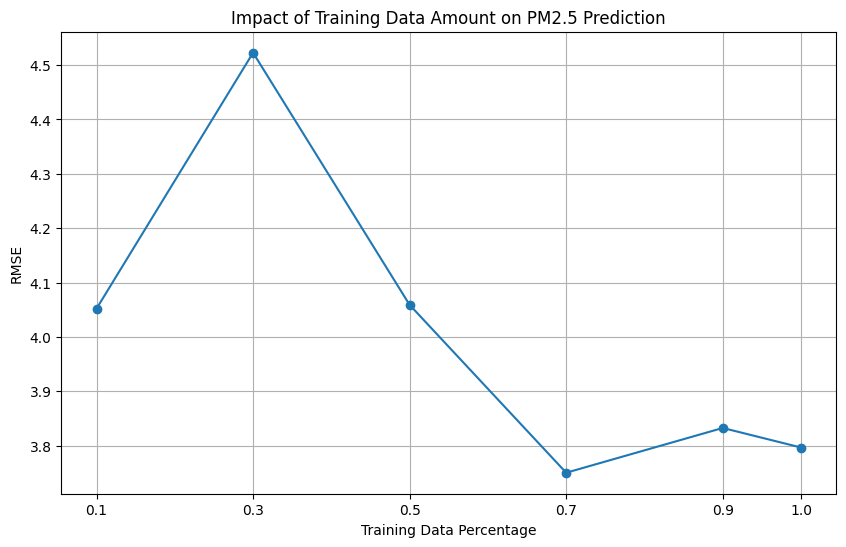

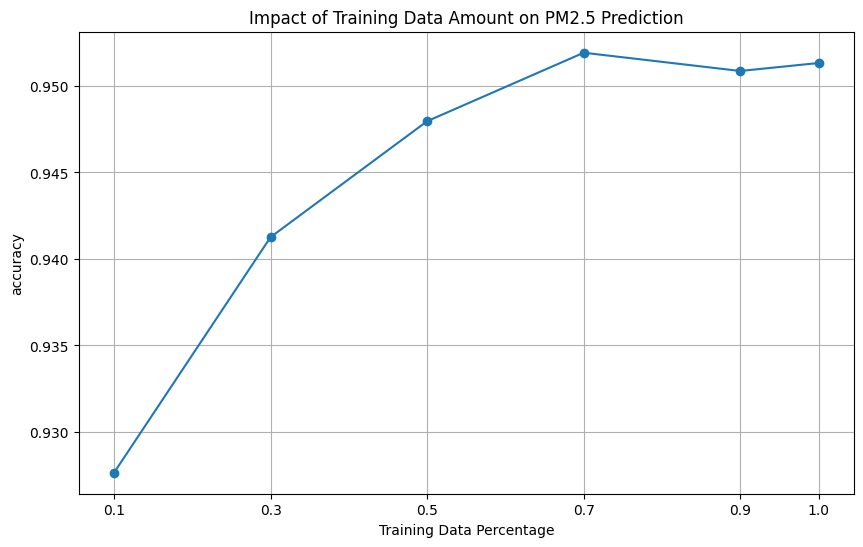

In [ ]:
###Q2:比較不同數量數據集的accuracy###
###比較訓練集大小對結果是否有影響
training_data_percentages = [0.1, 0.3, 0.5, 0.7, 0.9, 1]

# 保存不同訓練數據量對應的 RMSE
rmse_scores = []
accuracy_scores = []

for percentage in training_data_percentages:
    # 根據設定的百分比提取對應大小的訓練數據集
    num_train_samples = int(percentage * len(arr_x_train))
    X_train = arr_x_train[:num_train_samples]
    y_train = arr_y_train[:num_train_samples]
    # print(X_train)
    # print(y_train)
    # 訓練模型
    w_trained,train_loss = linear_regression(X_train, y_train, 0.01, 3000)
    rmse_scores.append(train_loss)
    # print(train_loss)
    accuracy = get_accuracy(y_train, train_loss)
    accuracy_scores.append(accuracy)


# 繪製折線圖
plt.figure(figsize=(10, 6))
plt.plot(training_data_percentages, rmse_scores, marker='o')
plt.xlabel('Training Data Percentage')
plt.ylabel('RMSE')
plt.title('Impact of Training Data Amount on PM2.5 Prediction')
plt.xticks(training_data_percentages)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(training_data_percentages, accuracy_scores, marker='o')
plt.xlabel('Training Data Percentage')
plt.ylabel('accuracy')
plt.title('Impact of Training Data Amount on PM2.5 Prediction')
plt.xticks(training_data_percentages)
plt.grid(True)
plt.show()

In [ ]:
###Q3：添加正則化後對accuracy得影響
training_data_percentages = [0.7]
lambda_reg_values = [0.001, 0.01, 0.1, 1, 10, 100]

# 保存不同訓練數據量對應的 RMSE
rmse_scores = []
accuracy_scores = []

for percentage in training_data_percentages:
  for i in lambda_reg_values:
    # 根據設定的百分比提取對應大小的訓練數據集
    num_train_samples = int(percentage * len(arr_x_train))
    X_train = arr_x_train[:num_train_samples]
    y_train = arr_y_train[:num_train_samples]
    # print(X_train)
    # print(y_train)
    # 訓練模型
    w_trained,train_loss = linear_regression(X_train, y_train, 0.01, 3000, i)
    rmse_scores.append(train_loss)
    print(train_loss)
    accuracy = get_accuracy(y_train, train_loss)
    accuracy_scores.append(accuracy)


plt.figure(figsize=(10, 6))
plt.plot(lambda_reg_values, rmse_scores, marker='o')
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('RMSE')
plt.title('Impact of Ridge Regularization on PM2.5 Prediction')
plt.xscale('log')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(lambda_reg_values, accuracy_scores, marker='o')
plt.xlabel('Regularization Parameter (lambda)')
plt.ylabel('Accuracy')
plt.title('Impact of Ridge Regularization on PM2.5 Prediction')
plt.xscale('log')
plt.show()

In [ ]:
# 將二維數組轉換為一維數組
y_pred_test_flattened = test_pred.flatten()

# 印出轉換後的一維數組形狀
print("轉換後的一維數組形狀：", y_pred_test_flattened.shape)
print(y_pred_test_flattened)

In [ ]:
##寫入CSV
import csv
test_pred_index = []
for i in range(0,244):
  test_pred_index.append("index_"+str(i))
print(test_pred_index)

dict = {"index": test_pred_index , "answer": y_pred_test_flattened}
df = pd.DataFrame(dict)
print(df)
df.iloc[:,0:3].to_csv("/content/drive/MyDrive/NYCU_DM/HW1/Data/sampleSubmission.csv")